In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.3.0
tensorflow.keras 2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [4]:
# normalization: u = 0, sigma = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu'))

model.add(keras.layers.AlphaDropout(rate=0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "tf_mnist_model.h5")

callbacks=[keras.callbacks.TensorBoard(logdir),
          keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
          keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]


In [7]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), callbacks=callbacks)

Epoch 1/10
   1/1719 [..............................] - ETA: 0s - loss: 3.1350 - accuracy: 0.1562WARNING:tensorflow:From /Users/siyangxie/environment/tf_py3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6267 - accuracy: 0.7822 - val_loss: 0.4978 - val_accuracy: 0.8518
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4346 - accuracy: 0.8451 - val_loss: 0.5265 - val_accuracy: 0.8488
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3860 - accuracy: 0.8622 - val_loss: 0.4282 - val_accuracy: 0.8722
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3582 - accuracy: 0.8713 - val_loss: 0.4282 - val_accuracy: 0.8658
Epoch 5/10
1719/1719 [=============

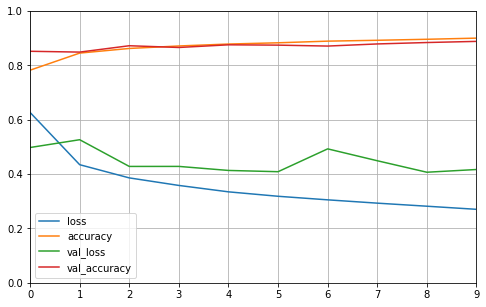

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8780


[0.451018363237381, 0.878000020980835]

In [10]:
print(history)